In [3]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
savePath = '/content/drive/My Drive/UCB22/EPS109/finalProject/animation_final/' # the path to save the figure, need to be adjusted on your own side!!

In [5]:
# part 1: cold Jupiter and its circular orbit, r=5 (AU)
ms = 10**3
mp = 1
G = 3 * 10**(-6)
dt = 10**(-2)
iterations = 140000

r = np.zeros(2)
r[0] = 5
r[1] = 0
v = np.zeros(2)
v[0] = 0
v[1] = np.sqrt(G*ms/r[0])
y = np.concatenate((r,v))

In [6]:
def KeplerODE(y):
  global mp,ms,G
  r = y[0:2]
  v = y[2:4]
  drdt = v
  radii = np.sqrt((r[0]**2 + r[1]**2))
  F = -G*ms*mp/(radii**3)*r
  a = F/mp
  dvdt = a

  return np.concatenate((drdt,dvdt)) 

In [7]:
xt_original = []
yt_original = []
for i in range(iterations):
  F1 = KeplerODE(y)
  F2 = KeplerODE(y+dt*F1/2)
  F3 = KeplerODE(y+dt*F2/2)
  F4 = KeplerODE(y+dt*F3)
  y = y + (dt/6)*(F1 + 2*F2 + 2*F3 + F4)
  xt_original.append(y[0])
  yt_original.append(y[1])

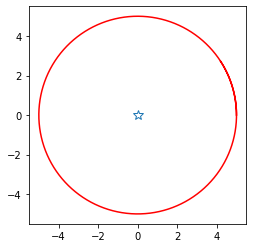

In [8]:
plt.plot(xt_original,yt_original,'r-')
plt.plot(0,0,'*',mfc='w',ms=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [9]:
# part 2: sudden deceleration on cold Jupiter
f = 0.1 # Cold Jupiter’s velocity is suddenly reduced by a factor of f, where 0 ≤ f ≤ 1
r = np.zeros(2)
r[0] = 5
r[1] = 0
v = np.zeros(2)
v[0] = 0*f
v[1] = np.sqrt(G*ms/r[0])*f
y = np.concatenate((r,v))

In [10]:
xt_then = []
yt_then = []
for i in range(iterations):
  F1 = KeplerODE(y)
  F2 = KeplerODE(y+dt*F1/2)
  F3 = KeplerODE(y+dt*F2/2)
  F4 = KeplerODE(y+dt*F3)
  y = y + (dt/6)*(F1 + 2*F2 + 2*F3 + F4)
  xt_then.append(y[0])
  yt_then.append(y[1])

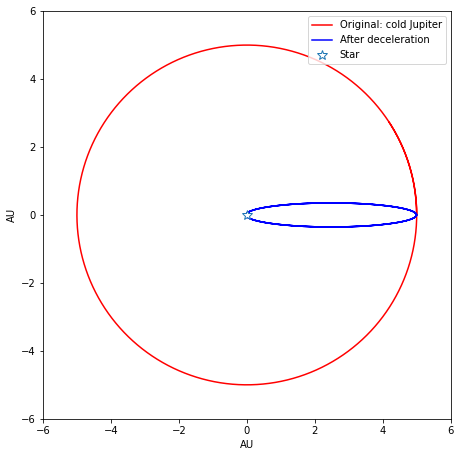

In [11]:
height = 10
width = 7.5
fig = plt.figure(figsize=(height, width))
plt.plot(xt_original, yt_original, 'r-', label='Original: cold Jupiter')
plt.plot(xt_then,yt_then, 'b-', label='After deceleration')
plt.plot(0,0,'*',mfc='w',ms=10, label='Star')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel('AU')
plt.ylabel('AU')
plt.show()

In [16]:
# part 3: tidal dissipation in orbit evolution
f = 0.18 # Cold Jupiter’s velocity is suddenly reduced by a factor of f, where 0 ≤ f ≤ 1
r = np.zeros(2)
r[0] = 5
r[1] = 0
v = np.zeros(2)
v[0] = 0*f
v[1] = np.sqrt(G*ms/r[0])*f
y = np.concatenate((r,v))

In [17]:
def tidalHeating(e, y):
  r = y[0:2]
  v = y[2:4]
  radii = np.linalg.norm(r)

  
  if e < 10**(-4):
    factor = 1
    print(1)
    print(factor)
  elif e > 0.05:
    factor = 0.8 * (e)**(-0.05)
    print(2)
    print(factor)
  else:
    factor = 1-e
    print(3)
    print(factor)
  '''
  factor = 0.9
  '''
  v = v/factor
  r = r*factor
  y = np.concatenate((r,v))
  return y

2
0.8013185457724566
2
0.8016526412734081
2
0.8020728244343185
2
0.802602124284264
2
0.8032702172293024
2
0.8041156747905444
2
0.8051891520069575
2
0.8065579708630042
2
0.8083132712126269
2
0.810580906715583
2
0.8135401438819545
2
0.8174557378112559
2
0.822740958853915
2
0.8300921411714115
2
0.8408312657305012
2
0.858073103732799
2
0.8952871033335934
1
1
1
1
1
1


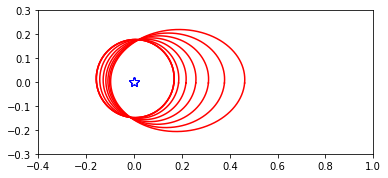

In [18]:
dt = 10**(-2)
for orbits in range(20):
  xt = []
  yt = []
  goAhead = True
  while goAhead:
    F1 = KeplerODE(y)
    F2 = KeplerODE(y+dt*F1/2)
    F3 = KeplerODE(y+dt*F2/2)
    F4 = KeplerODE(y+dt*F3)
    y = y + (dt/6)*(F1 + 2*F2 + 2*F3 + F4)
    xt.append(y[0])
    yt.append(y[1])
    if abs(y[1]) < 0.005 and y[0] > 0 and np.min(xt) < 0:
      a = (np.max(xt) - np.min(xt))/2
      b = (np.max(yt) - np.min(yt))/2
      if b >= a:
        e = 0
      else:
        e = np.sqrt(1 - (b**2/a**2))
      y = tidalHeating(e, y)
      goAhead = False
  if orbits <= 10:
    plt.plot(xt,yt,'r-')
    plt.plot(0,0,'*',mfc='w',color='b', ms=10)
    plt.xlim(-0.4, 5.5)
    plt.ylim(-0.8, 0.8)
    plt.gca().set_aspect('equal', adjustable='box')
    fileName = '221128_EPS109_finalProject_animation_orbit' + str(orbits) + '.jpg'
    plt.savefig(savePath+fileName, format='jpg')
  else:
    if orbits == 11:
      plt.clf()
    plt.plot(xt,yt,'r-')
    plt.plot(0,0,'*',mfc='w',color='b', ms=10)
    plt.xlim(-0.4, 1)
    plt.ylim(-0.3, 0.3)
    plt.gca().set_aspect('equal', adjustable='box')
    fileName = '221128_EPS109_finalProject_animation_orbit' + str(orbits) + '.jpg'
    plt.savefig(savePath+fileName, format='jpg')   



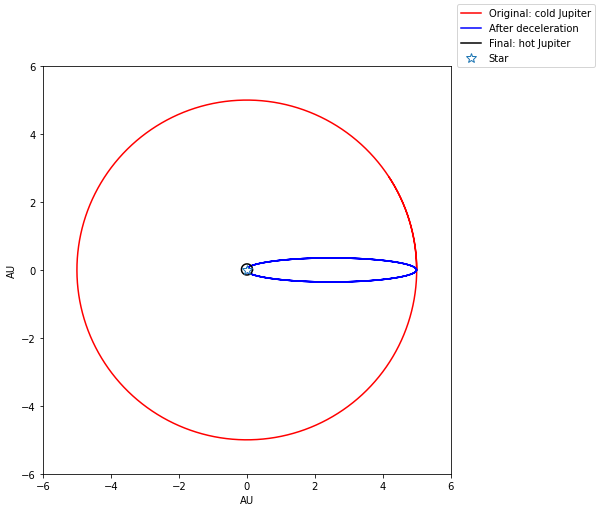

In [15]:
height = 10
width = 7.5
fig = plt.figure(figsize=(height, width))
plt.plot(xt_original, yt_original, 'r-', label='Original: cold Jupiter')
plt.plot(xt_then,yt_then, color='b', label='After deceleration')
plt.plot(xt,yt, color='black', label='Final: hot Jupiter')
plt.plot(0,0,'*',mfc='w',ms=10, label='Star')
plt.gca().set_aspect('equal', adjustable='box')
fig.legend()
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel('AU')
plt.ylabel('AU')
fileName = '221128_EPS109_finalProject_final.tif'
savePath = '/content/drive/My Drive/UCB22/EPS109/finalProject/'
plt.savefig(savePath+fileName, format='tif')
plt.show()